In [13]:
py -m venv venv

SyntaxError: invalid syntax (4084680146.py, line 1)

In [23]:
#instal req packages
!pip install -r requirements.txt

In [24]:
# import libs
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.model_selection import cross_validate
#warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [21]:
#read
df = pd.read_csv("autoscout_phase2.csv")

In [22]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [26]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000,26711.000000
mean,23537.240538,68863.811928,1708.964696,5.820112,129.525841,1425.205421,1.460073,5.166448,118.414380,5.531746
std,20811.986347,62794.146434,772.439713,1.416920,54.255203,307.386873,0.852665,4.654800,65.642485,2.220290
min,490.000000,0.000000,0.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12490.000000,19155.000000,1248.000000,5.000000,105.000000,1228.000000,1.000000,2.000000,80.000000,4.300000
50%,18440.000000,54000.000000,1595.000000,6.000000,123.000000,1375.000000,1.000000,4.000000,100.000000,5.200000
75%,28330.000000,100675.000000,1969.000000,6.000000,150.000000,1597.000000,2.000000,7.000000,135.000000,6.400000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


In [27]:
# clean dups
df.duplicated().sum()

1815

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

# Drop make_models with less than 100 counts 

In [30]:
# 100 is not enough 
make_model_count=df.make_model.value_counts()
make_model_count


make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [31]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [32]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)
    
# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [33]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,"Alloy wheels, Automatically dimming interior m...",1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,"Alloy wheels, Automatically dimming interior m...",1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,Sport seats,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.0,Sedan,Used,No,114000.0,Manual,Diesel,Private seller,1969.0,6.0,94.0,Front,"All season tyres, Ambient lighting, Cargo barr...",1532.0,Yes,Cloth,1.0,efficient,4.0,88.0,3.6,Standard,Standard,Safety Premium Package
18193,Volvo S60,Volvo,"CALLE CATALUNYA, 37, 8520 LLERONA, ES",4999.0,Sedan,Used,Yes,166512.0,Manual,Benzine,Dealer,2521.0,5.0,145.0,Front,Alloy wheels,1550.0,No,Part/Full Leather,3.0,efficient,18.0,154.0,9.1,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.0,Sedan,Used,Yes,40345.0,Automatic,Diesel,Dealer,1969.0,8.0,127.0,4WD,Alloy wheels,2077.0,No,Part/Full Leather,2.0,efficient,3.0,288.0,2.0,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.0,Sedan,Used,Yes,96000.0,Manual,Diesel,Dealer,1560.0,6.0,99.0,Front,"Alloy wheels, Automatically dimming interior m...",1356.0,Yes,Cloth,1.0,unefficient,11.0,84.0,3.8,Standard,Standard,Safety Premium Package


In [34]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

make_model
Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala      

In [35]:
len(df.make_model.value_counts())

70

In [36]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [37]:
df.head(2)

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,"Alloy wheels, Automatically dimming interior m...",1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,"Alloy wheels, Automatically dimming interior m...",1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package


In [38]:
df_object = df.select_dtypes(include ="object").head()
df_object

# # select_dtypes(include ="object") method to filter only object type features 

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [39]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


In [40]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feature.

In [41]:
df.head() # check extras feature turned into numeric

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,5,1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,6,1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1425.0,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1455.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package


In [42]:
df.extras.nunique()  # 6478 unique value --> 

21

In [43]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

In [44]:
df2 = df.copy()

Skewness for price :  2.473903804317343


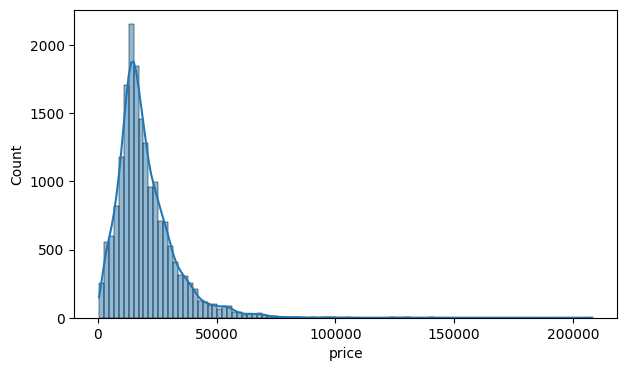

In [45]:
sns.histplot(df.price, bins=100, kde=True);
print("Skewness for price : ",skew(df.price))
# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [46]:
df.select_dtypes(include ="number")

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,24400.0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,7450.0,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,29800.0,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,21000.0,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,26800.0,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...
18192,13000.0,114000.0,1969.0,6.0,94.0,9,1532.0,1.0,4.0,88.0,3.6
18193,4999.0,166512.0,2521.0,5.0,145.0,1,1550.0,3.0,18.0,154.0,9.1
18194,37600.0,40345.0,1969.0,8.0,127.0,1,2077.0,2.0,3.0,288.0,2.0
18195,7300.0,96000.0,1560.0,6.0,99.0,3,1356.0,1.0,11.0,84.0,3.8


<Axes: >

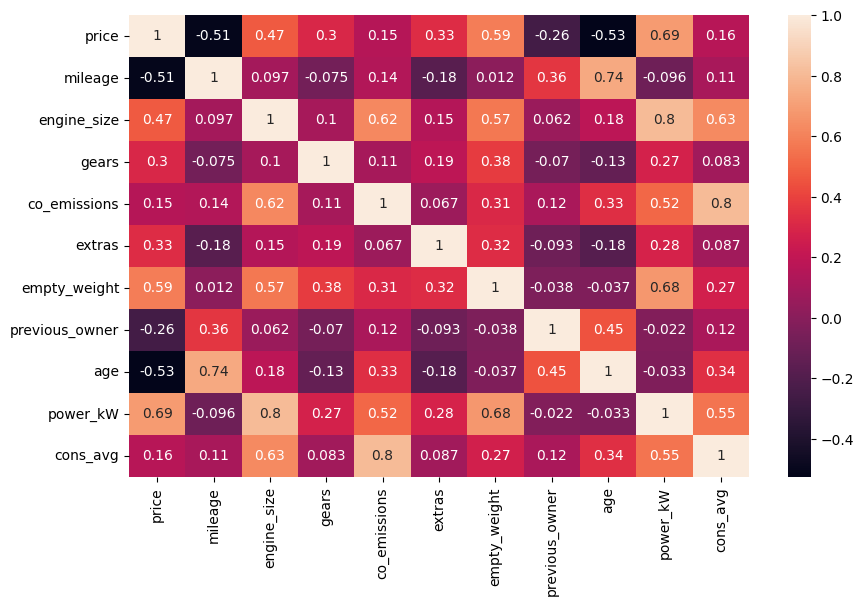

In [47]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot =True)

In [48]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any()

price             False
mileage           False
engine_size       False
gears             False
co_emissions      False
extras            False
empty_weight      False
previous_owner    False
age               False
power_kW          False
cons_avg          False
dtype: bool

In [49]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

In [50]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.9 MB 558.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.9 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.9 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.9 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.9 MB 3.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.3/9.9 MB 4.4 MB/s eta 0:00:02
   ---------- --------

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
X_vif = df_numeric.drop(columns='price')
X_vif.head()

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9


In [53]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns
df_vif

,features
0,mileage
1,engine_size
2,gears
3,co_emissions
4,extras
5,empty_weight
6,previous_owner
7,age
8,power_kW
9,cons_avg


In [54]:
variance_inflation_factor(X_vif.values, 0)

5.471118337441996

In [55]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [56]:
df_vif


,features,VIF
0,mileage,5.471118
1,engine_size,25.196104
2,gears,21.675253
3,co_emissions,23.504770
4,extras,2.780753
5,empty_weight,38.757802
6,previous_owner,4.798746
7,age,6.879670
8,power_kW,17.867896
9,cons_avg,24.705654


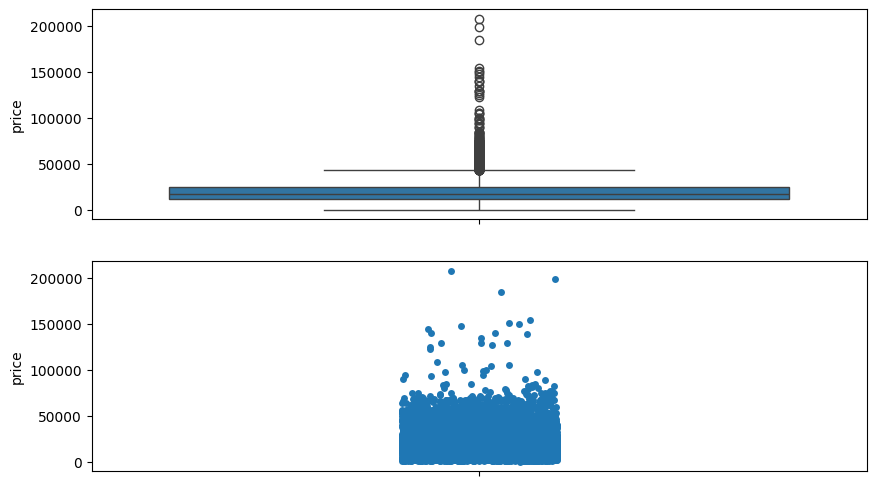

In [57]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

In [58]:
df.make_model.unique()

# unique groups in our data

array(['Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra', 'Opel Adam',
       'Opel Insignia', 'Opel Cascada', 'Opel Grandland X',
       'Renault Megane', 'Renault Clio', 'Renault Captur',
       'Renault Talisman', 'Renault Kadjar', 'Peugeot 308', 'Peugeot 206',
       'Peugeot 208', 'Peugeot 207', 'Peugeot 3008', 'Peugeot 508',
       'Peugeot RCZ', 'Peugeot 2008', 'Fiat 500', 'Fiat Tipo',
       'Fiat 500X', 'Fiat Panda', 'Fiat 500C', 'SEAT Leon', 'SEAT Ibiza',
       'SEAT Arona', 'SEAT Ateca', 'Skoda Octavia', 'Skoda Scala',
       'Skoda Fabia', 'Skoda Superb', 'Skoda Kodiaq', 'Skoda Karoq',
       'Dacia Sandero', 'Dacia Logan', 'Dacia Duster', 'Toyota Yaris',
       'Toyota Aygo', 'Toyota Corolla', 'Toyota Auris', 'Toyota C-HR',
       'Toyota RAV 4', 'Nissan Micra', 'Nissan Qashqai', 'Nissan Juke',
       'Nissan Pulsar', 'Nissan 370Z', 'Nissan 350Z', 'Nissan X-Trail',
       'Ford Fiesta', 'Ford Focus', 'Ford Mondeo', 'Ford Kuga',
       'Ford Mustang', 'Hyundai i30', 'Hyund

In [59]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)].count()
    # Returns the total number of values that are below the lower limit and above the upper limit.
    
    rate_of_outliers = (count_of_outliers / len(df[df['make_model'] == model])).round(3)
    # We are finding the outlier rate for each make_model.
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<19} : {count_of_outliers:<2}, The rate of outliers : {rate_of_outliers}")
print() 

rate_of_total_outliers=(sum(total_outliers)/len(df)).round(3)
# The ratio of the total number of outliers for all make_models to the overall data

print(f"The Count of total outliers : {sum(total_outliers)}, The rate of total outliers : {rate_of_total_outliers}")

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Mercedes-Benz A 180 : 0 , The rate of outliers : 0.0
 The count of outlier for Opel Corsa          : 4 , The rate of outliers : 0.011
 The count of outlier for Opel Astra          : 10, The rate of outliers : 0.016
 The count of outlier for Opel Adam           : 1 , The rate of outliers : 0.009
 The count of outlier for Opel Insignia       : 19, The rate of outliers : 0.066
 The count of outlier for Opel Cascada        : 1 , The rate of outliers : 0.008
 The count of outlier for Opel Grandland X    : 1 , The rate of outliers : 0.007
 The count of outlier for Renault Megane      : 38, The rate of outliers : 0.046
 The count of outlier for Renault Clio        : 8 , The rate of outliers : 0.02
 The count of outlier for Renault Captur      : 0 , The rate of outliers : 0.0
 The count of outlier for Renault Talisman    : 5 , The rate of outliers : 0.036
 The count of outlier for Renault Kadjar      : 7 , The rate of outliers : 0.055
 The count of outlier for Peugeot

In [60]:
#use the best practices
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [61]:
def adj_r2(actual, prediction, X):
    r2 = r2_score(actual, prediction)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [64]:
df.to_csv("ml_data.csv", index = False)

# ML

In [62]:
X= df.drop(columns="price")
y= df.price

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package


In [67]:
cat_onehot  = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']

cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [68]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(categories=[cat_for_type, 
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")


# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("lr", LinearRegression())]

lr_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('lr', LinearRegression())])

In [70]:
pd.options.display.float_format = '{:.3f}'.format
train_val(lr_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.831,0.831
mae,2858.452,2825.333
mse,27101821.747,24549364.068
rmse,5205.941,4954.731
mape,0.202,0.193


In [71]:
y_pred=lr_pipe.predict(X_test)
y_train_pred = lr_pipe.predict(X_train)

rmse_test=mean_squared_error(y_test, y_pred, squared=False)
rmse_train=mean_squared_error(y_train, y_train_pred, squared=False)

print("rmse_test  :", rmse_test)
print("rmse_train :", rmse_train)

rmse_test  : 4954.731482894145
rmse_train : 5205.941004954173


In [72]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train))

test adj_R2 score  : 0.8294422719639741
train adj_R2 score : 0.8311463478139653


In [73]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("lr", LinearRegression())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [74]:
scores = pd.DataFrame(scores, index = range(1, 11))
# scores
scores.iloc[:,2:].mean()

test_r2                                            0.831
train_r2                                           0.832
test_neg_mean_absolute_error                   -2878.325
train_neg_mean_absolute_error                  -2856.173
test_neg_mean_squared_error                -27499043.606
train_neg_mean_squared_error               -27080353.346
test_neg_root_mean_squared_error               -5198.519
train_neg_root_mean_squared_error              -5203.237
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [75]:
y_pred = lr_pipe.predict(X_test)

lr_R2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_mape= mean_absolute_percentage_error(y_test, y_pred)

# Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

In [77]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [78]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.831,0.830
mae,2847.997,2812.821
mse,27093298.722,24565785.672
rmse,5205.122,4956.388
mape,0.201,0.191


In [79]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [80]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.832
train_r2                                           0.832
test_neg_mean_absolute_error                   -2868.108
train_neg_mean_absolute_error                  -2847.382
test_neg_mean_squared_error                -27480933.664
train_neg_mean_squared_error               -27073983.874
test_neg_root_mean_squared_error               -5196.227
train_neg_root_mean_squared_error              -5202.626
test_neg_mean_absolute_percentage_error           -0.202
train_neg_mean_absolute_percentage_error          -0.201
dtype: float64

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
alpha_space = np.linspace(0.001, 100, 100)

In [83]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10, 
                          n_jobs = 1,
                          return_train_score=True)
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [84]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

In [86]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 325.1 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 521.8 kB/s eta 0:00:01
     ------------------------ ----------- 194.6/282.6 kB 841.6 kB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.0 MB/s eta 0:00:00


In [243]:
# !pip install --upgrade matplotlib

In [87]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

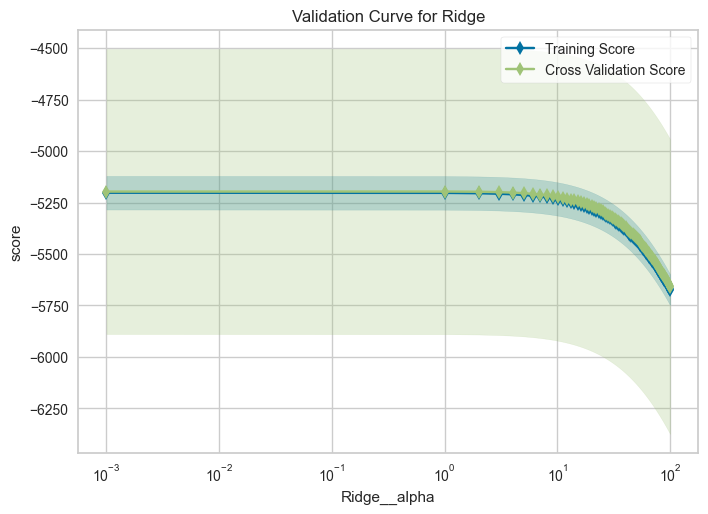

In [88]:
#viz it or sneeze it
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
                      pipe_model, 
                      param_name="Ridge__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error", 
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [89]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -5196.232
mean_train_score   -5202.640
Name: 1, dtype: object

In [90]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.831,0.830
mae,2847.954,2812.770
mse,27093421.472,24566030.271
rmse,5205.134,4956.413
mape,0.201,0.191


In [91]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

# Lasso Regression

In [92]:
from sklearn.linear_model import Lasso

In [93]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [94]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.831,0.830
mae,2850.400,2818.257
mse,27117742.702,24647298.007
rmse,5207.470,4964.605
mape,0.201,0.192


In [95]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [96]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.831
train_r2                                           0.831
test_neg_mean_absolute_error                   -2870.526
train_neg_mean_absolute_error                  -2850.201
test_neg_mean_squared_error                -27489204.726
train_neg_mean_squared_error               -27097207.944
test_neg_root_mean_squared_error               -5197.161
train_neg_root_mean_squared_error              -5204.858
test_neg_mean_absolute_percentage_error           -0.202
train_neg_mean_absolute_percentage_error          -0.201
dtype: float64

In [97]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [98]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [99]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [ ]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Lasso__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=1
)

viz.fit(X_train, y_train)
viz.show();

In [101]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -5196.470
mean_train_score   -5201.932
Name: 0, dtype: object

In [102]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.832,0.831
mae,2852.622,2817.996
mse,27087370.626,24544605.018
rmse,5204.553,4954.251
mape,0.202,0.192


In [103]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

# ElasticNet 

In [104]:
from sklearn.linear_model import ElasticNet

In [105]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [106]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.440,0.453
mae,6190.160,5869.128
mse,90050914.199,79293170.393
rmse,9489.516,8904.671
mape,0.533,0.505


In [107]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [108]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.442
train_r2                                           0.440
test_neg_mean_absolute_error                   -6189.418
train_neg_mean_absolute_error                  -6185.910
test_neg_mean_squared_error                -90091090.994
train_neg_mean_squared_error               -89952516.061
test_neg_root_mean_squared_error               -9455.239
train_neg_root_mean_squared_error              -9484.009
test_neg_mean_absolute_percentage_error           -0.533
train_neg_mean_absolute_percentage_error          -0.533
dtype: float64

In [109]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = 1,
                          return_train_score=True)

In [ ]:
elastic_grid_model.fit(X_train, y_train)

In [ ]:
elastic_grid_model.best_estimator_

In [ ]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state = 42))]

rf_model = Pipeline(steps=operations)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=42))])

In [116]:
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.988,0.939
mae,667.098,1745.866
mse,1855156.716,8864898.218
rmse,1362.041,2977.398
mape,0.039,0.103


In [117]:
from sklearn.model_selection import cross_validate

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state = 42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                            0.916
train_r2                                           0.988
test_neg_mean_absolute_error                   -1815.002
train_neg_mean_absolute_error                   -679.275
test_neg_mean_squared_error                -13548672.054
train_neg_mean_squared_error                -1971725.168
test_neg_root_mean_squared_error               -3632.605
train_neg_root_mean_squared_error              -1403.635
test_neg_mean_absolute_percentage_error           -0.106
train_neg_mean_absolute_percentage_error          -0.039
dtype: float64

In [118]:
param_grid = {"RF_model__n_estimators":[40, 64],
              "RF_model__max_depth": [7,8],
              "RF_model__max_features": [0.3,0.4]}

In [119]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state = 42))]

model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=1,
                          return_train_score=True)
rf_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=1,
             param_grid={'RF_model__max_depth': [7, 8],
                         'RF_model__max_features': [0.3, 0.4],
                         'RF_model__n_estimators': [40, 64]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [121]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=8, max_features=0.4,
                                       n_estimators=64, random_state=42))])

In [122]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4022.310
mean_train_score   -3226.554
Name: 7, dtype: object

In [123]:
train_val(rf_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.933,0.921
mae,2104.958,2252.571
mse,10755733.055,11390420.818
rmse,3279.593,3374.970
mape,0.140,0.150


In [124]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("RF_model", RandomForestRegressor(n_estimators = 64,
                                                 max_depth =8,
                                                 max_features = 0.4,
                                                 random_state = 42))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_r2                                            0.898
train_r2                                           0.935
test_neg_mean_absolute_error                   -2317.067
train_neg_mean_absolute_error                  -2091.393
test_neg_mean_squared_error                -16500294.067
train_neg_mean_squared_error               -10412061.947
test_neg_root_mean_squared_error               -4022.310
train_neg_root_mean_squared_error              -3226.554
test_neg_mean_absolute_percentage_error           -0.149
train_neg_mean_absolute_percentage_error          -0.138
dtype: float64

In [125]:
y_pred = rf_grid_model.predict(X_test)
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
rf_mape= mean_absolute_percentage_error(y_test, y_pred)

# Compare Models

In [128]:
data = {
    "Model": ["Linear Regression", "Random Forest", "Lasso"],
    "R2": [lr_R2, rf_R2, lasm_R2],
    "MAE": [lr_mae, rf_mae, lasm_mae,],
    "RMSE": [lr_rmse, rf_rmse, lasm_rmse],
    "MAPE": [lr_mape, rf_mape, lasm_mape]
}

compare = pd.DataFrame(data)
compare.sort_values("R2", ascending = False)

,Model,R2,MAE,RMSE,MAPE
1,Random Forest,0.921,2252.571,3374.970,0.150
2,Lasso,0.831,2817.996,4954.251,0.192
0,Linear Regression,0.831,2825.333,4954.731,0.193


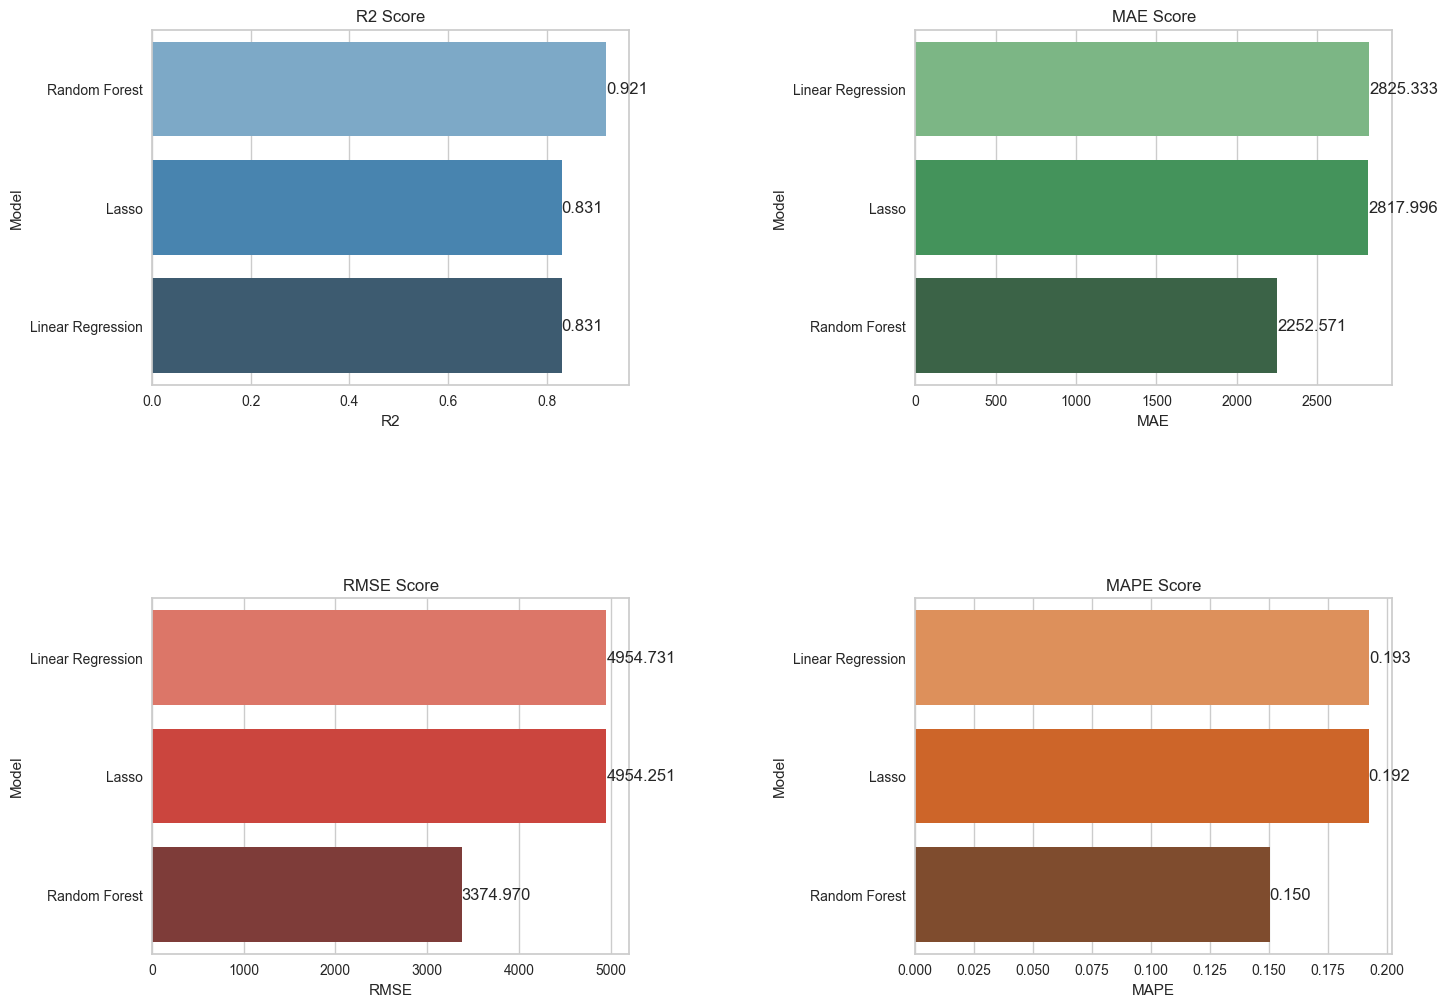

In [129]:
compare_r2 = compare.sort_values(by="R2", ascending=False)
compare_mae = compare.sort_values(by="MAE", ascending=False)
compare_rmse = compare.sort_values(by="RMSE", ascending=False)
compare_mape = compare.sort_values(by="MAPE", ascending=False)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.6, wspace=0.6)  # Değişen satır

sns.barplot(x="R2", y="Model", data=compare_r2, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("R2 Score")


sns.barplot(x="MAE", y="Model", data=compare_mae, ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("MAE Score")

sns.barplot(x="RMSE", y="Model", data=compare_rmse, ax=axes[1, 0], palette="Reds_d")
axes[1, 0].set_title("RMSE Score")


sns.barplot(x="MAPE", y="Model", data=compare_mape, ax=axes[1, 1], palette="Oranges_d")
axes[1, 1].set_title("MAPE Score")

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.3f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center')

plt.show()

In [130]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("RF_model", RandomForestRegressor(n_estimators = 64,
                                                 max_depth =8,
                                                 max_features = 0.4,
                                                 random_state = 42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=8, max_features=0.4,
                                       n_estimators=64, random_state=42))])

In [131]:
features = pipe_model["OneHot_Ordinal_Encoder"].get_feature_names_out()
features

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai IONIQ',
       'make_model_Hyundai TUCSON', 'make_model_Hyundai i20',
       'make_model_Hyundai i30', 'make_model_Mercedes-Benz A 180',
       'make_model_Nissan 350Z', 'make_model_Nissan 370Z',
       'make_model_Nissan Juke', 'make_model_Nissan Micra',
       'make_model_Nissan Pulsar', 'make_model_Nissan Qashqai',
       'make_model_Nissan X-Trail', 'make_model_Opel Adam',
       'make_model_Opel Astra', 'make_model_Opel Cascada',
       'make_model_Opel Corsa', 'make_model_Opel Grandland X',
       'make_model_Opel Insignia', 'make_model_Peugeot 2008',
       'make_model_Peugeot 206', 'make

In [132]:
pipe_model["RF_model"].feature_importances_

array([7.38781501e-06, 1.20840034e-07, 1.28661306e-04, 1.33045345e-05,
       4.70712450e-05, 3.45734321e-05, 5.01234247e-06, 7.35365782e-05,
       1.72599150e-05, 7.97986154e-05, 1.26162139e-04, 5.85254825e-06,
       1.29457210e-02, 6.28556913e-05, 1.50600618e-05, 2.71832115e-05,
       4.92019243e-05, 2.52015601e-04, 3.07320645e-04, 2.81108799e-04,
       2.68333587e-05, 1.54448813e-05, 5.08498905e-06, 4.68834927e-05,
       2.30073391e-06, 2.40488553e-06, 5.45710976e-05, 3.68272195e-05,
       0.00000000e+00, 1.66622411e-04, 1.32570092e-04, 3.24959469e-06,
       2.21121086e-05, 9.07394738e-06, 9.43006706e-06, 6.26067979e-05,
       5.20225734e-05, 5.31158248e-04, 4.46036813e-05, 9.39419465e-06,
       7.55594789e-04, 0.00000000e+00, 3.48290535e-04, 5.16880281e-06,
       0.00000000e+00, 9.00970261e-06, 1.01117847e-05, 1.14677924e-04,
       1.00696246e-06, 1.93700638e-05, 2.79354421e-04, 2.34385034e-05,
       2.14693271e-05, 8.81423587e-05, 2.48295540e-05, 8.76023548e-07,
      

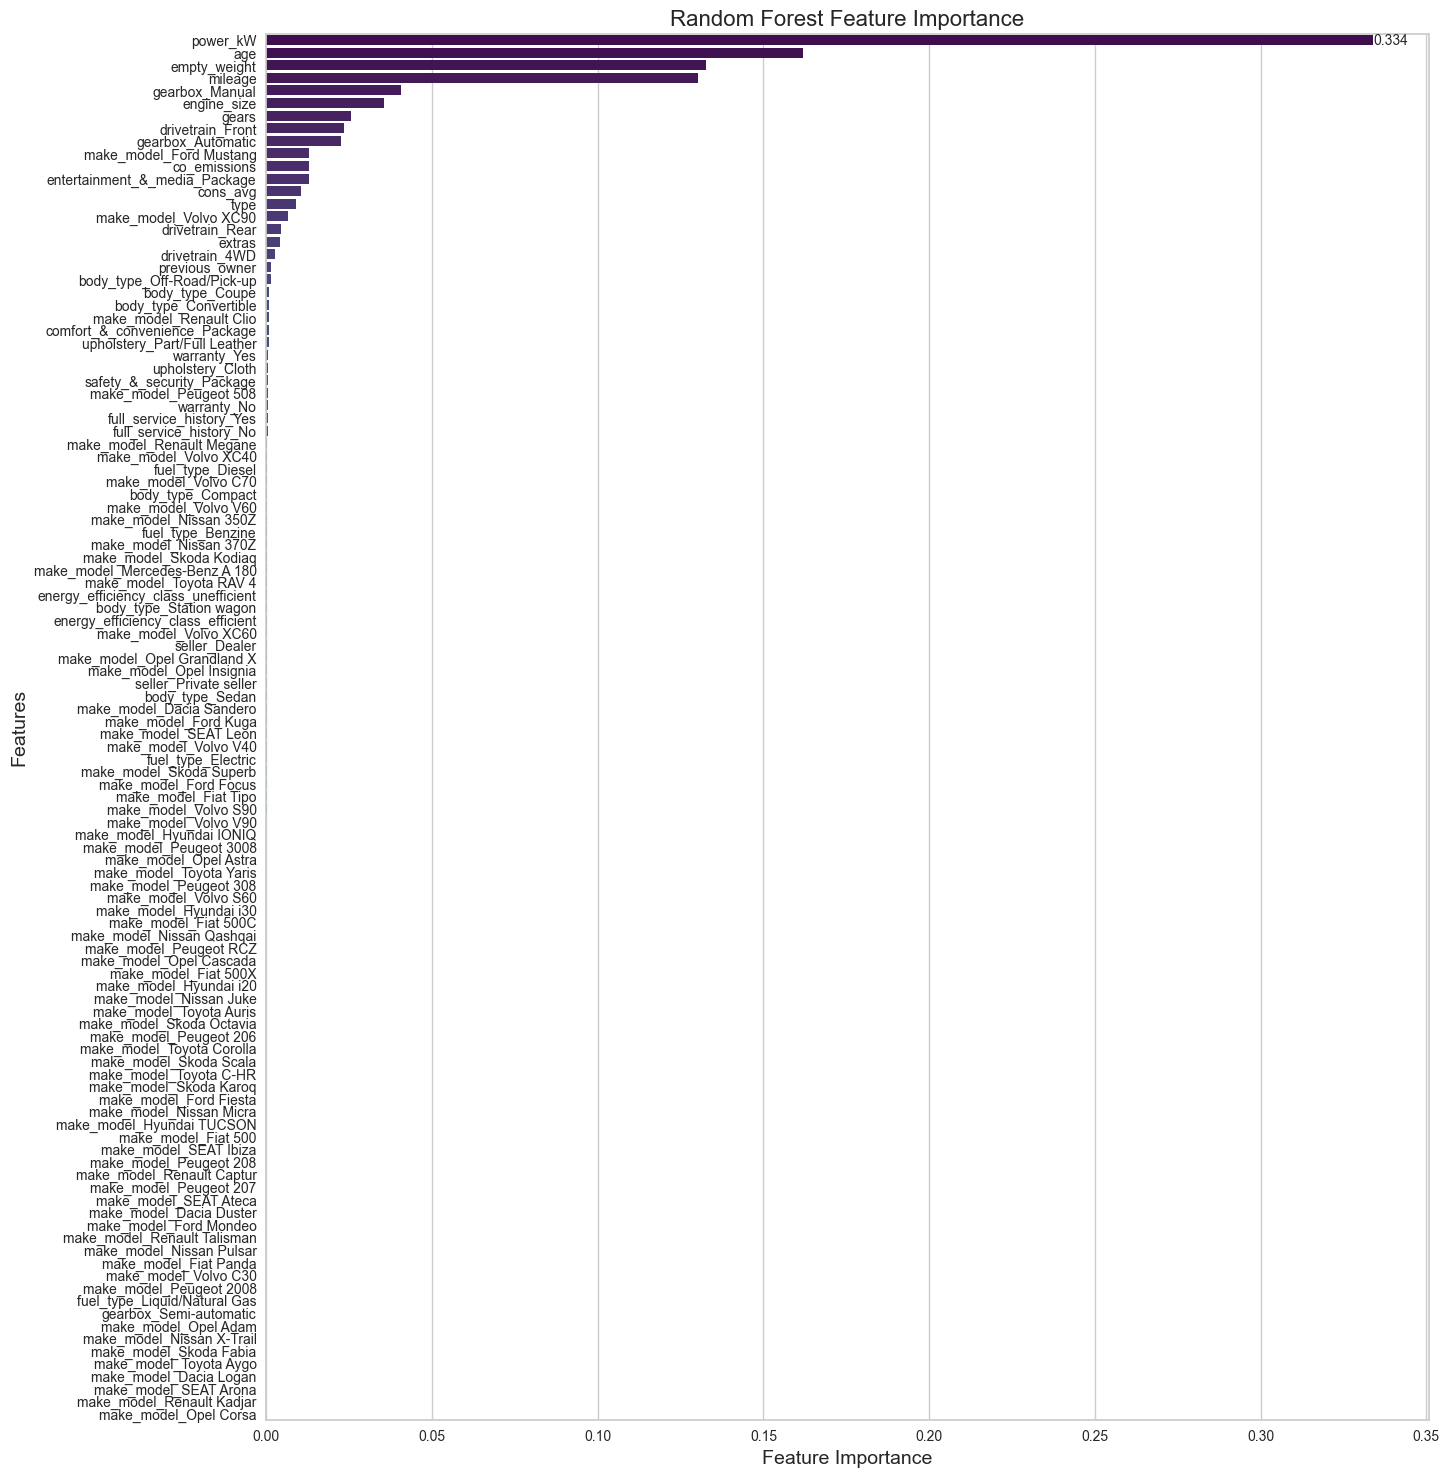

In [133]:
df_f_i = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_,
                      index=features,
                      columns=["Feature Importance"])
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

plt.figure(figsize=(15, 18))  # Grafik boyutunu artırın
ax = sns.barplot(x='Feature Importance', y=df_f_i.index, data=df_f_i, palette="viridis")
ax.bar_label(ax.containers[0], fmt="%.3f", fontsize=10)
plt.title("Random Forest Feature Importance", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()



In [134]:
df_rf = df[["make_model", "power_kW", "age", "empty_weight", "mileage",
            "gearbox", "gears", "drivetrain", "cons_avg", "co_emissions", "price"]]
df_rf.head()

,make_model,power_kW,age,empty_weight,mileage,gearbox,gears,drivetrain,cons_avg,co_emissions,price
0,Mercedes-Benz A 180,85.000,2.000,1330.000,27150.000,Manual,6.000,Front,4.500,120.000,24400.000
1,Mercedes-Benz A 180,80.000,12.000,1295.000,157500.000,Manual,6.000,Front,5.200,138.000,7450.000
2,Mercedes-Benz A 180,85.000,2.000,1445.000,21734.000,Automatic,7.000,Front,3.900,99.500,29800.000
3,Mercedes-Benz A 180,80.000,4.000,1425.000,172700.000,Automatic,7.000,Front,3.700,99.500,21000.000
4,Mercedes-Benz A 180,85.000,2.000,1455.000,18989.000,Automatic,7.000,Front,3.900,99.500,26800.000


In [135]:
df_rf.to_csv("rf_data.csv", index = False)

In [136]:
X_rf= df_rf.drop(columns="price")
y_rf= df_rf.price

In [137]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [138]:
df_rf.select_dtypes(include="object").head(1)

,make_model,gearbox,drivetrain
0,Mercedes-Benz A 180,Manual,Front


In [139]:
cat_onehot  = ['make_model','gearbox', 'drivetrain']

In [140]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")


In [141]:
operations = [("OneHotEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(n_estimators = 64,
                                                 max_depth =8,
                                                 max_features = 0.4,
                                                 random_state = 42))]

rf_pipe_model = Pipeline(steps=operations)

rf_pipe_model.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'gearbox',
                                                   'drivetrain'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=8, max_features=0.4,
                                       n_estimators=64, random_state=42))])

In [142]:
pd.options.display.float_format = '{:.3f}'.format
train_val(rf_pipe_model, X_train_rf, y_train_rf, X_test_rf, y_test_rf)

,train,test
R2,0.925,0.909
mae,2180.241,2341.336
mse,12125596.862,13215594.623
rmse,3482.183,3635.326
mape,0.143,0.154


In [143]:
operations = [("OneHotEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(n_estimators = 64,
                                                 max_depth =8,
                                                 max_features = 0.4,
                                                 random_state = 42))]


model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train_rf,
                        y_train_rf,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        n_jobs=1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_r2                                            0.892
train_r2                                           0.927
test_neg_mean_absolute_error                   -2383.390
train_neg_mean_absolute_error                  -2172.106
test_neg_mean_squared_error                -17412968.958
train_neg_mean_squared_error               -11811895.510
test_neg_root_mean_squared_error               -4149.234
train_neg_root_mean_squared_error              -3436.619
test_neg_mean_absolute_percentage_error           -0.152
train_neg_mean_absolute_percentage_error          -0.142
dtype: float64

In [144]:
import pickle
filename = 'best_model'
pickle.dump(rf_pipe_model, open(filename, 'wb'))

In [145]:
rf_pipe_model = pickle.load(open('best_model', 'rb'))

In [146]:
columns=list(df_rf.columns)
columns

['make_model',
 'power_kW',
 'age',
 'empty_weight',
 'mileage',
 'gearbox',
 'gears',
 'drivetrain',
 'cons_avg',
 'co_emissions',
 'price']

In [147]:
rf_predict = df_rf.drop("price", axis =1).mean(numeric_only = True)
rf_predict

power_kW         109.053
age                4.897
empty_weight    1362.953
mileage        66124.962
gears              5.790
cons_avg           5.341
co_emissions     125.129
dtype: float64

In [148]:
df_rf.select_dtypes(include="object").columns


Index(['make_model', 'gearbox', 'drivetrain'], dtype='object')

In [149]:
rf_predict["make_model"] = "Nissan Juke"
rf_predict["gearbox"] = "Automatic"
rf_predict["drivetrain"] = "Rear"

In [150]:
rf_predict = pd.DataFrame(rf_predict).T
rf_predict

,power_kW,age,empty_weight,mileage,gears,cons_avg,co_emissions,make_model,gearbox,drivetrain
0,109.053,4.897,1362.953,66124.962,5.790,5.341,125.129,Nissan Juke,Automatic,Rear


In [151]:
rf_pipe_model.predict(rf_predict)

array([19564.43384577])